In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV,StratifiedKFold
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler

In [3]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x105da0278>,
      dtype=object)

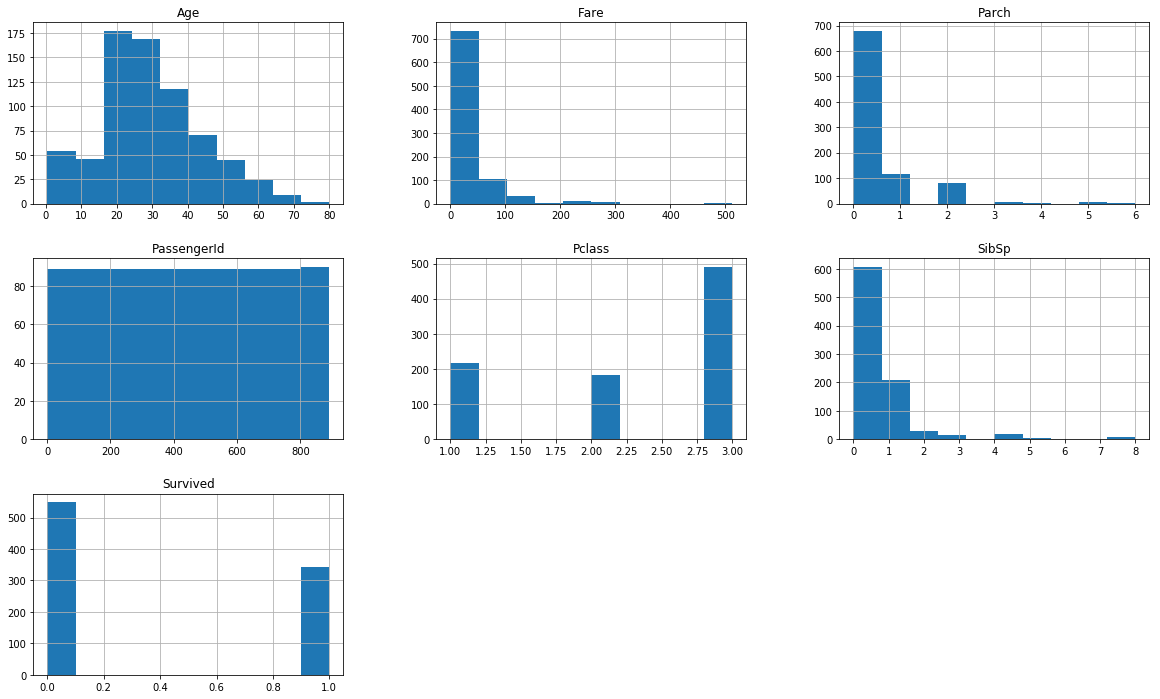

In [7]:
train.hist(figsize=(20,12))

In [8]:
def  bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))
    

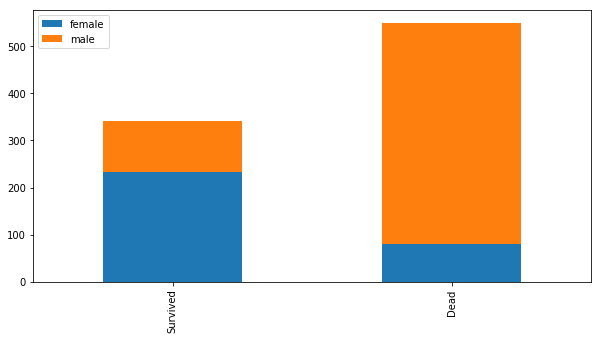

In [9]:
bar_chart("Sex")

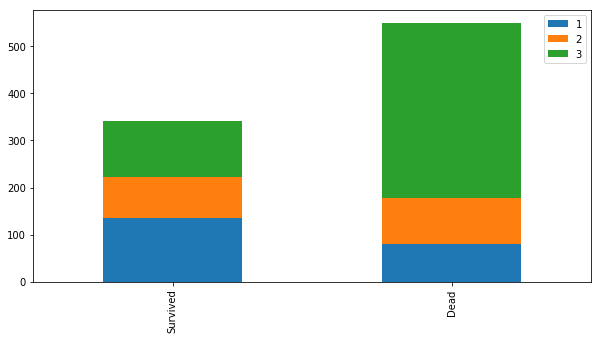

In [10]:
bar_chart("Pclass")

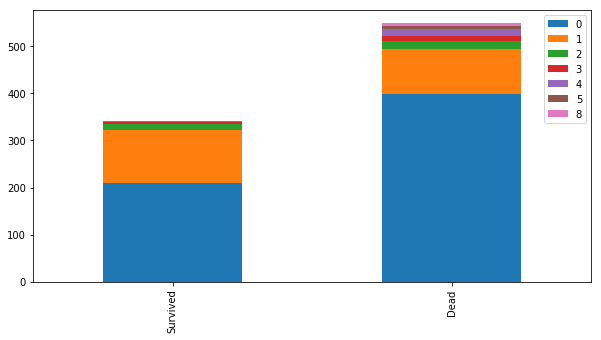

In [11]:
bar_chart("SibSp")

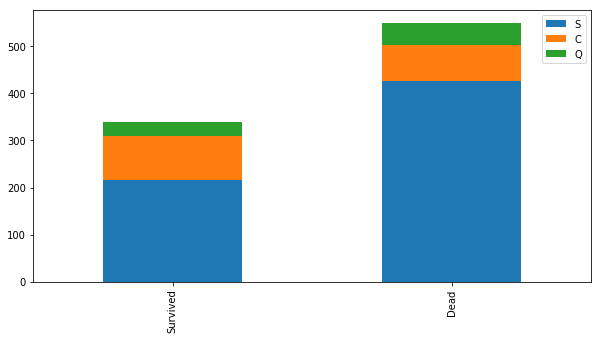

In [12]:
bar_chart('Embarked')

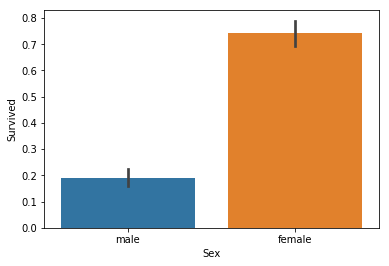

In [13]:
sns.barplot(y="Survived",x="Sex",data=train)

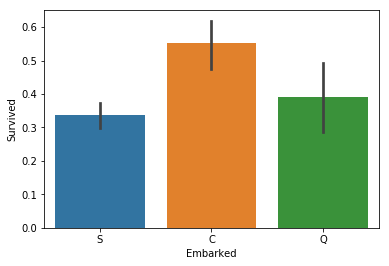

In [14]:
sns.barplot(y="Survived",x="Embarked",data=train)

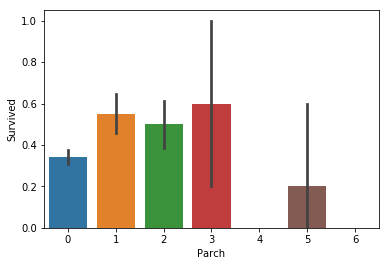

In [15]:
t=sns.barplot(y="Survived",x="Parch",data=train)

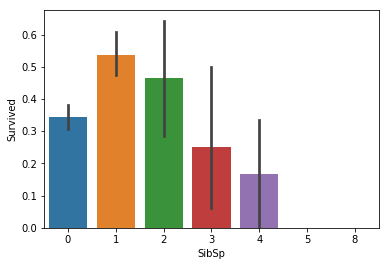

In [16]:
t=sns.barplot(y="Survived",x="SibSp",data=train)

In [17]:
train = pd.read_csv("data/train.csv")
y=train.Survived.values
test = pd.read_csv("data/test.csv")
pas_id=test.PassengerId.values
train_test_data = pd.concat([train, test],axis=0)

/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """


In [18]:
train_test_data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [19]:
train_test_data.shape

(1309, 12)

In [20]:
title=[]
for i in train_test_data['Name']:
    t=i.split(",")[1].split(".")[0].strip()
    title.append(t)
train_test_data["Title"]=title

In [21]:
train_test_data.Title.value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Ms                2
Major             2
Mlle              2
Sir               1
the Countess      1
Lady              1
Capt              1
Dona              1
Mme               1
Jonkheer          1
Don               1
Name: Title, dtype: int64

In [22]:
# Title_Dictionary = {
#     "Capt": "Officer",
#     "Col": "Officer",
#     "Major": "Officer",
#     "Jonkheer": "Royalty",
#     "Don": "Royalty",
#     "Sir" : "Royalty",
#     "Dr": "Officer",
#     "Rev": "Officer",
#     "the Countess":"Royalty",
#     "Mme": "Mrs",
#     "Mlle": "Miss",
#     "Ms": "Mrs",
#     "Mr" : "Mr",
#     "Mrs" : "Mrs",
#     "Miss" : "Miss",
#     "Master" : "Master",
#     "Lady" : "Royalty"
# }
# train_test_data['Title'] = train_test_data.Title.map(Title_Dictionary)

In [23]:
train_test_data.Title.value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Ms                2
Major             2
Mlle              2
Sir               1
the Countess      1
Lady              1
Capt              1
Dona              1
Mme               1
Jonkheer          1
Don               1
Name: Title, dtype: int64

In [24]:
train_test_data['FamilySize'] = train_test_data['Parch'] + train_test_data['SibSp'] + 1

In [25]:
train_test_data.FamilySize.value_counts()

1     790
2     235
3     159
4      43
6      25
5      22
7      16
11     11
8       8
Name: FamilySize, dtype: int64

In [26]:
train_test_data['Singleton'] = train_test_data['FamilySize'].map(lambda s: 1 if s == 1 else 0)
train_test_data['SmallFamily'] = train_test_data['FamilySize'].map(lambda s: 1 if 2 <= s <= 4 else 0)
train_test_data['LargeFamily'] = train_test_data['FamilySize'].map(lambda s: 1 if 5 <= s else 0)

In [27]:
CleanTicket=[]
for i in train_test_data.Ticket:
    i = i.replace('.', '')
    i = i.replace('/', '')
    i = i.split()[0]
    if i.isalpha():
        CleanTicket.append(i)
    else:
        CleanTicket.append("Number")

In [28]:
train_test_data["CleanTicket"]=CleanTicket

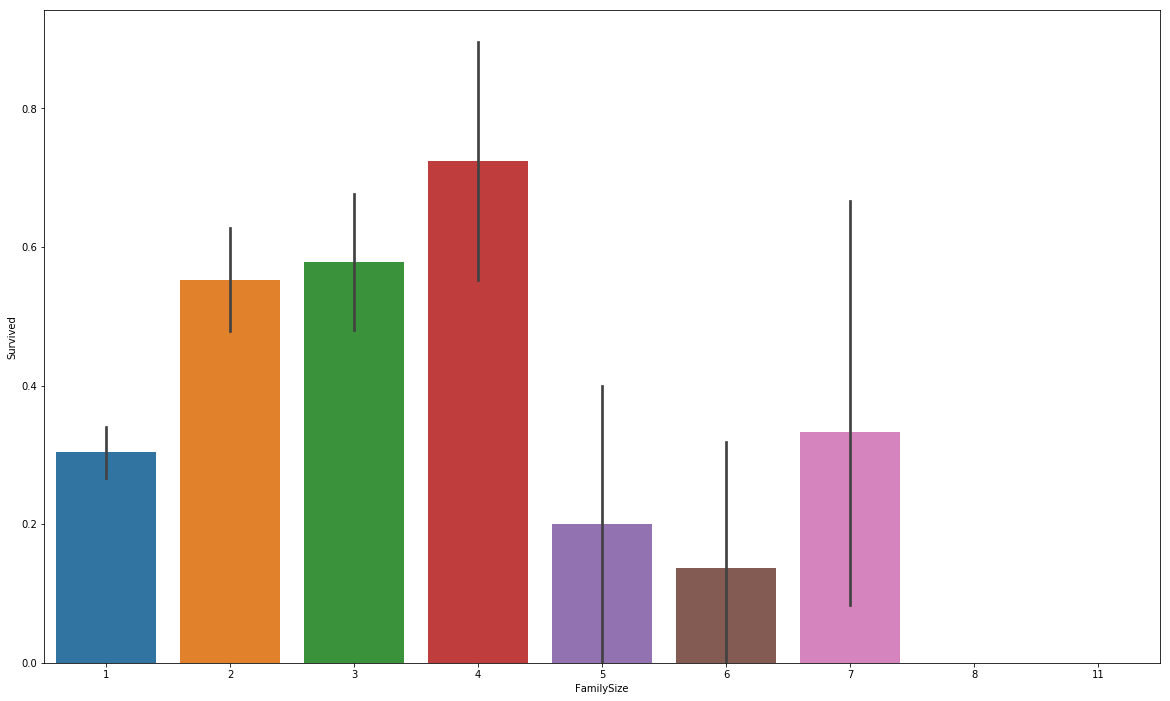

In [29]:
plt.figure(figsize=(20,12))
sns.barplot("FamilySize","Survived",data=train_test_data)

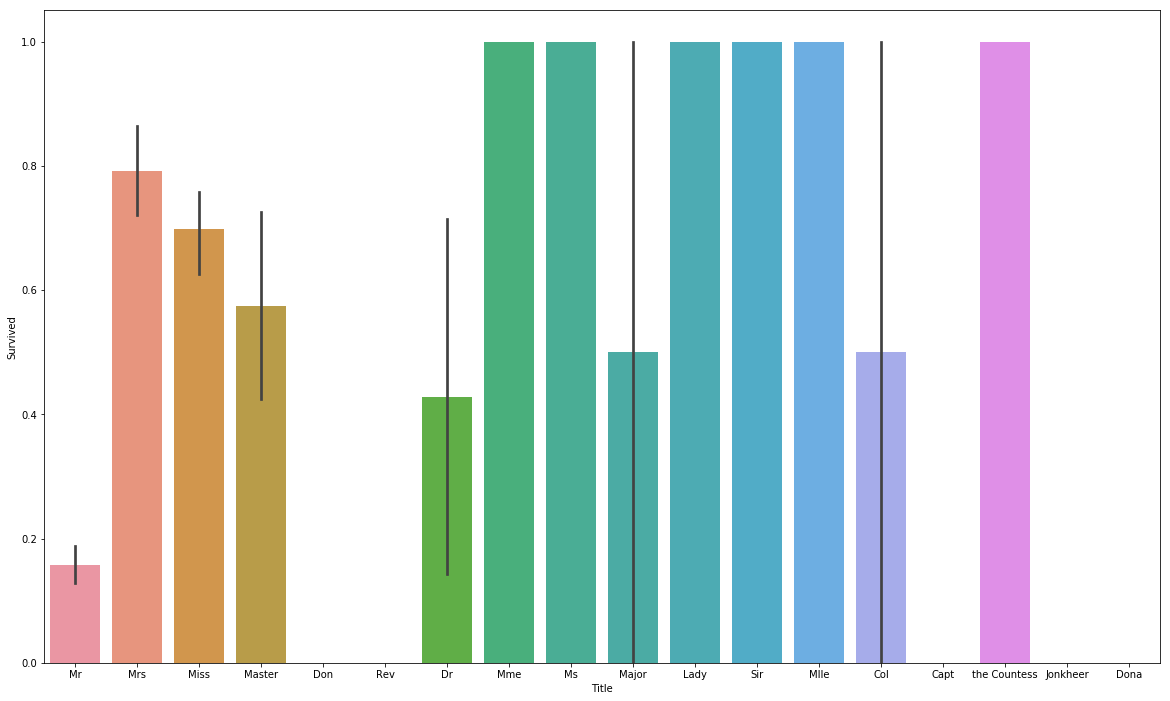

In [30]:
plt.figure(figsize=(20,12))
sns.barplot("Title","Survived",data=train_test_data)

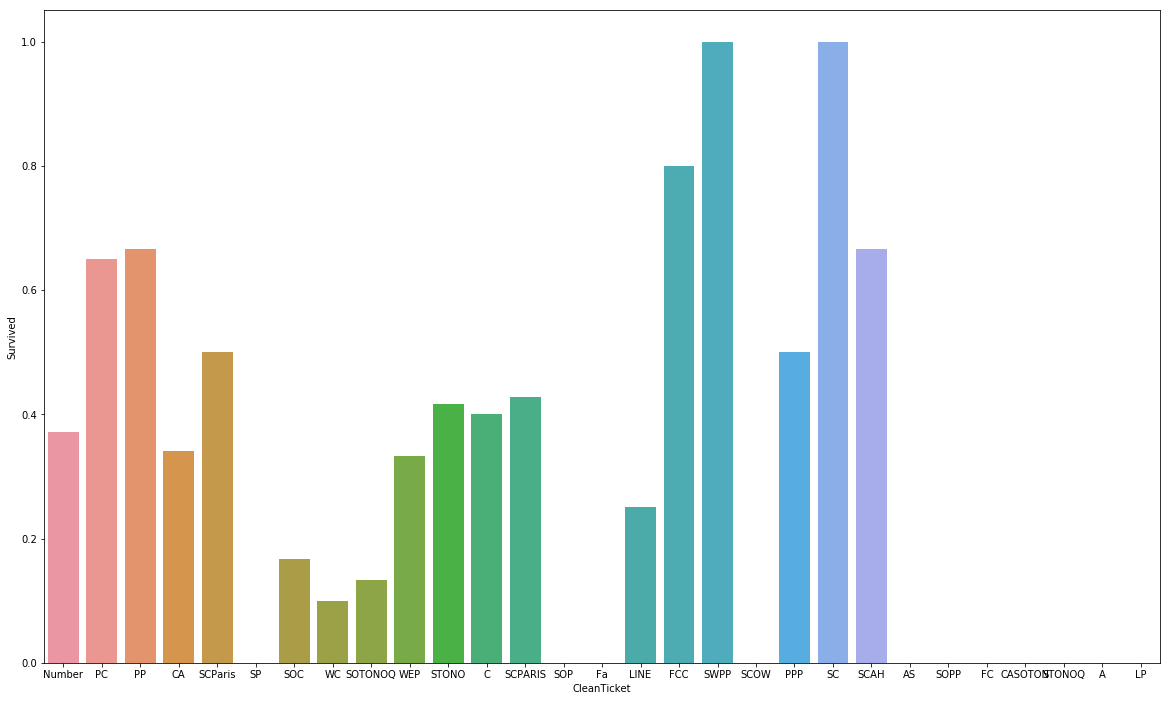

In [31]:
plt.figure(figsize=(20,12))
sns.barplot("CleanTicket","Survived",data=train_test_data,ci=False)

In [32]:
train_test_data.drop(["Survived"],axis=1,inplace=True)

In [33]:
train_test_data.drop(["Name","FamilySize","Ticket"],axis=1,inplace=True)

In [34]:
def cable_name(x):
    try:
        return x[0]
    except TypeError:
        return "None"
train_test_data["Cabin"]=train_test_data.Cabin.apply(cable_name)

In [35]:
train_test_data.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Singleton,SmallFamily,LargeFamily
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,29.881138,33.295479,0.385027,655.000000,2.294882,0.498854,0.603514,0.333843,0.062643
std,14.413493,51.758668,0.865560,378.020061,0.837836,1.041658,0.489354,0.471765,0.242413
min,0.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,328.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,655.000000,3.000000,0.000000,1.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,982.000000,3.000000,1.000000,1.000000,1.000000,0.000000
max,80.000000,512.329200,9.000000,1309.000000,3.000000,8.000000,1.000000,1.000000,1.000000


In [36]:
train_test_data['Age'].fillna(np.mean(train_test_data.Age),inplace=True)
train_test_data['Fare'].fillna(np.mean(train_test_data.Fare),inplace=True)
train_test_data['Fare'] = StandardScaler().fit_transform(train_test_data['Fare'].values.reshape(-1, 1))
train_test_data.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Singleton,SmallFamily,LargeFamily
count,1309.000000,1.309000e+03,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,29.881138,1.602996e-17,0.385027,655.000000,2.294882,0.498854,0.603514,0.333843,0.062643
std,12.883193,1.000382e+00,0.865560,378.020061,0.837836,1.041658,0.489354,0.471765,0.242413
min,0.170000,-6.437751e-01,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,-4.911082e-01,0.000000,328.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,29.881138,-3.643001e-01,0.000000,655.000000,3.000000,0.000000,1.000000,0.000000,0.000000
75%,35.000000,-3.906640e-02,0.000000,982.000000,3.000000,1.000000,1.000000,1.000000,0.000000
max,80.000000,9.262219e+00,9.000000,1309.000000,3.000000,8.000000,1.000000,1.000000,1.000000


In [37]:
num_data=train_test_data.select_dtypes(exclude=object).columns

In [38]:
train_test_data[num_data].head()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Singleton,SmallFamily,LargeFamily
0,22.0,-0.503595,0,1,3,1,0,1,0
1,38.0,0.734503,0,2,1,1,0,1,0
2,26.0,-0.490544,0,3,3,0,1,0,0
3,35.0,0.382925,0,4,1,1,0,1,0
4,35.0,-0.488127,0,5,3,0,1,0,0


In [39]:
cat_data=train_test_data.select_dtypes(include=object).columns

In [40]:
print(train_test_data[cat_data].info())
train_test_data['Embarked'].fillna(train_test_data['Embarked'].mode()[0], inplace = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 5 columns):
Cabin          1309 non-null object
Embarked       1307 non-null object
Sex            1309 non-null object
Title          1309 non-null object
CleanTicket    1309 non-null object
dtypes: object(5)
memory usage: 101.4+ KB
None


In [41]:
for i in cat_data:
    train_test_data[i].fillna("Missing",inplace=True)
    dummies=pd.get_dummies(train_test_data[i],prefix=i)
    train_test_data=pd.concat([train_test_data,dummies],axis=1)
    train_test_data.drop(i,axis=1,inplace=True)

In [42]:
train_test_data.head()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Singleton,SmallFamily,LargeFamily,Cabin_A,...,CleanTicket_SOC,CleanTicket_SOP,CleanTicket_SOPP,CleanTicket_SOTONOQ,CleanTicket_SP,CleanTicket_STONO,CleanTicket_STONOQ,CleanTicket_SWPP,CleanTicket_WC,CleanTicket_WEP
0,22.0,-0.503595,0,1,3,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,38.0,0.734503,0,2,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,26.0,-0.490544,0,3,3,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,35.0,0.382925,0,4,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,35.0,-0.488127,0,5,3,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
test_data=train_test_data.iloc[891:]
train_data=train_test_data.iloc[:891]
y=y
train=train_data
targets=y

In [44]:
clf = RandomForestClassifier(n_estimators=50, max_features='sqrt')
clf = clf.fit(train, targets)

In [45]:
features = pd.DataFrame()
features['feature'] = train.columns
features['importance'] = clf.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)

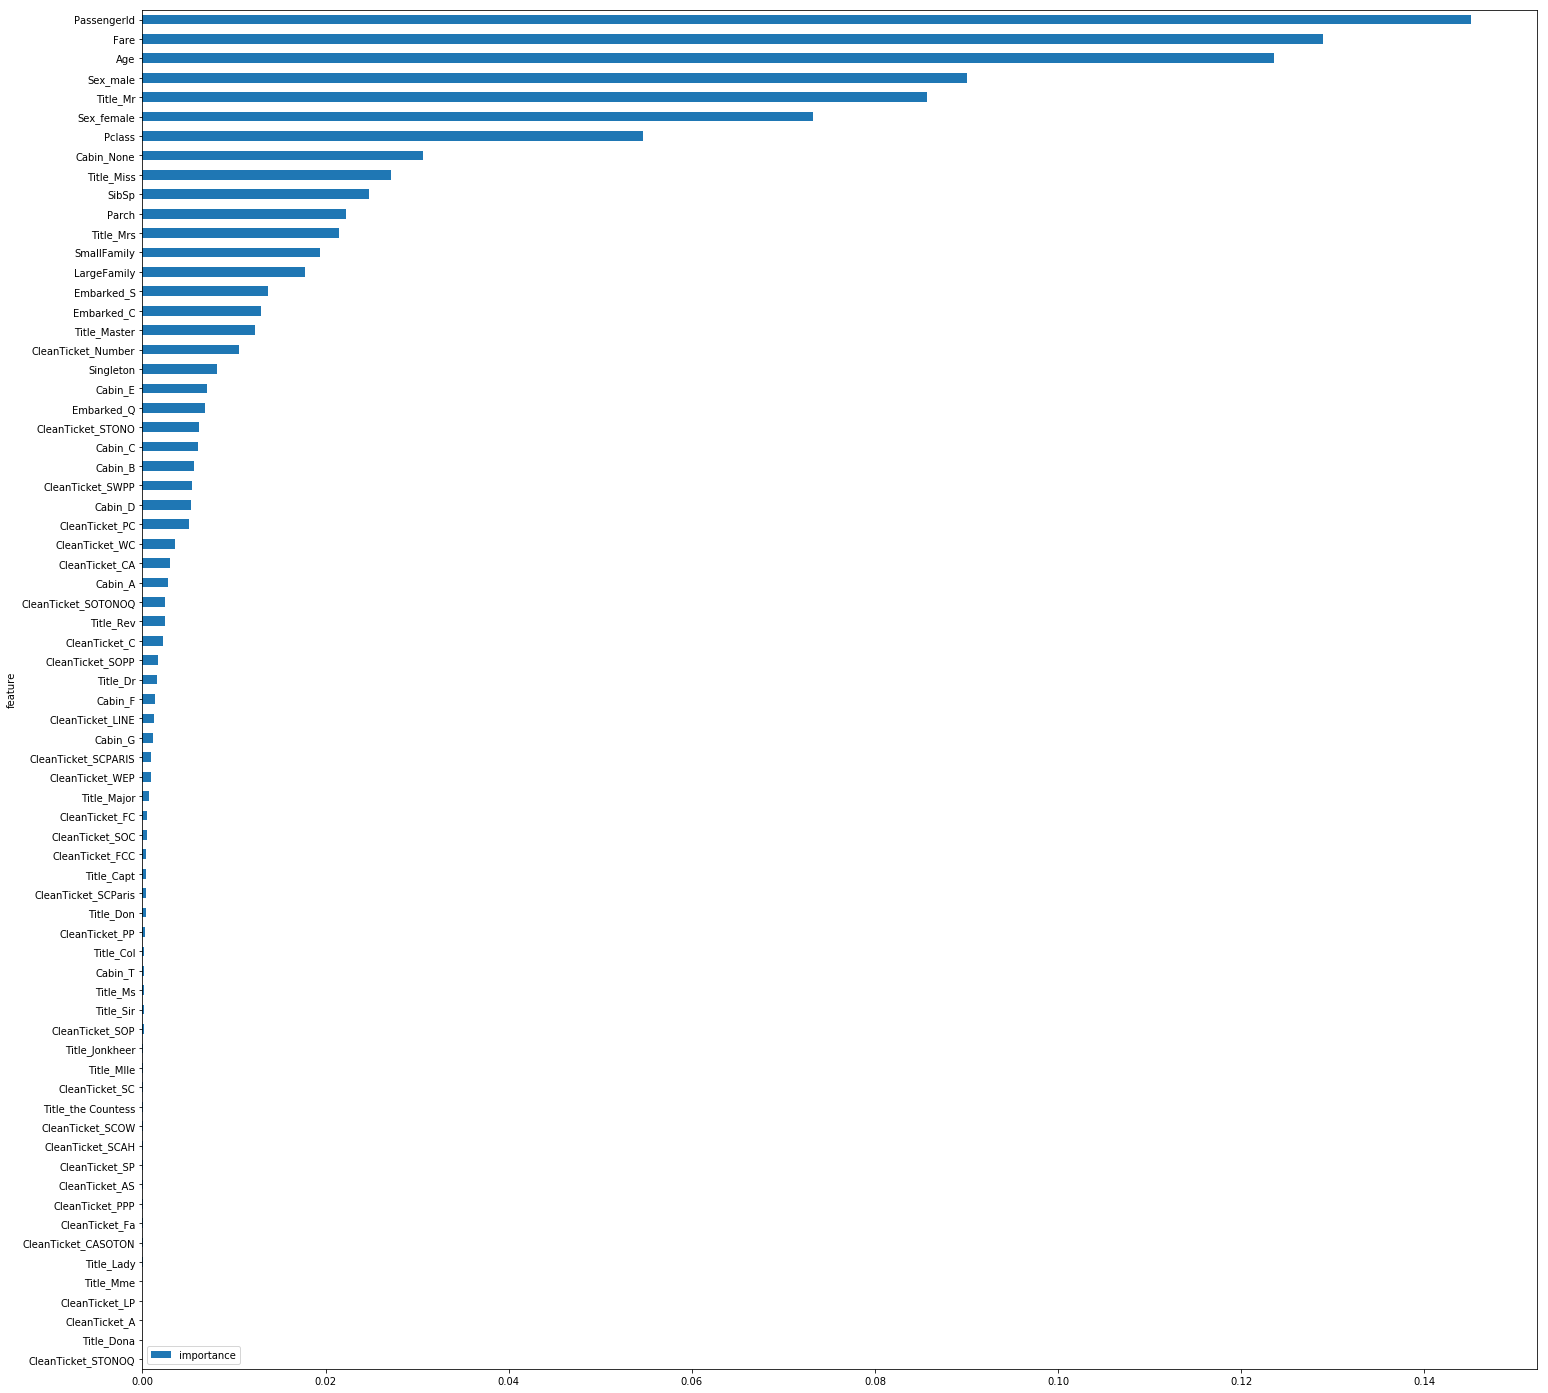

In [46]:
features.plot(kind='barh', figsize=(25, 25))

In [47]:
model = SelectFromModel(clf, prefit=True)
train_reduced = model.transform(train_data)
print(train_reduced.shape)
test_reduced = model.transform(test_data)
print(test_reduced.shape)

(891, 14)
(418, 14)


In [48]:
clf=RandomForestClassifier(min_samples_split=2,max_depth=6,bootstrap=True,min_samples_leaf=1,n_estimators=100,max_features='auto')
clf.fit(train_reduced,y)
pred=clf.predict(test_reduced)

In [49]:
test_data["Survived"]=pred
test_data[["PassengerId","Survived"]].to_csv("data/predictions/feature_engg_3.csv",index=False)

/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [50]:
# turn run_gs to True if you want to run the gridsearch again.
run_gs = False

if run_gs:
    parameter_grid = {
                 'max_depth' : [4, 6, 8],
                 'n_estimators': [50,10],
                 'max_features': ['sqrt', 'auto', 'log2'],
                 'min_samples_split': [2, 3, 10],
                 'min_samples_leaf': [1, 3, 10],
                 'bootstrap': [True, False],
                 }
    forest = RandomForestClassifier()
    cross_validation = StratifiedKFold(n_splits=5)

    grid_search = GridSearchCV(forest,
                               scoring='accuracy',
                               param_grid=parameter_grid,
                               cv=cross_validation,
                               verbose=1
                              )

    grid_search.fit(train_data, y)
    model = grid_search
    parameters = grid_search.best_params_

    print('Best score: {}'.format(grid_search.best_score_))
    print('Best parameters: {}'.format(grid_search.best_params_))
    
else: 
    parameters = {'bootstrap': False, 'min_samples_leaf': 3, 'n_estimators': 50, 
                  'min_samples_split': 10, 'max_features': 'sqrt', 'max_depth': 6}
    
    model = RandomForestClassifier(**parameters)
    model.fit(train_data, y)